# POLSCI 3 Fall 2021

## Week 8, Lecture Notebook 2: Generalizability

In [1]:
library(estimatr)
library(ggplot2)

data <- read.csv("ps3_KB_campaign.csv")
head(data)

,Experiment,SE,effect,precision,General,Primary,Treatment.within.2months.of.election
,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,Arceneaux (2007),19.0,42.3,0.002770083,0,1,1
2,Arceneaux (2007),13.0,18.3,0.005917160,0,1,1
3,Arceneaux (2007),8.0,18.6,0.015625000,0,1,1
4,Arceneaux and Kolodny (2009),15.5,-30.0,0.004162331,1,0,1
5,Arceneaux and Kolodny (2009),15.0,-22.0,0.004444444,1,0,1
6,"Bailey, Hopkins and Rogers (2016)",5.3,-9.4,0.035599858,1,0,1


In this dataset, every row is an experiment. The authors (me and Josh Kalla) collected information from previous experiments and collected it in this dataset for meta-analysis.

Here is a quick rundown of what each column means:

- `Experiment`: Paper reference of the experiment
- `effect`: estimate of the effect size
- `SE`: standard error of the effect estimate
- `precision`: precision; this is how precise the experiment is. defined as $\frac{1}{\text{Standard Error}^2}$ (weights to be used)
- `General`: binary variable indicating whether the experiment was done in a general election (1 = yes, 0 = no)
- `Primary`: binary variable indicating whether the experiment was done in a primary election (1 = yes, 0 = no). these elections are typically quieter
- `Treatment.within.2months.of.election`: binary variable incating whether the experiment took place within 2 months of election day (1 = yes, was within 2 months; 0 = no, was more than 2 months before election day)

In [2]:
# Looking at the first two entries (Arceneaux 2007), which of the two experiments are more precise? Why?
data[1:2,1:3]

,Experiment,SE,effect
,<chr>,<dbl>,<dbl>
1,Arceneaux (2007),19,42.3
2,Arceneaux (2007),13,18.3


In [3]:
# How do we find the overall weighted effect?
weighted.effect.overall <- weighted.mean(data$effect, data$precision)
weighted.effect.overall

[1] 0.4817423

In [4]:
# I'm going to create standard errors for you all.
simulations.overall <- c()
for (i in 1:1000) {
    temp.data <- data[sample(nrow(data), replace = TRUE),]
    temp.weighted.effect <- weighted.mean(temp.data$effect, temp.data$precision)
    simulations.overall <- append(simulations.overall, temp.weighted.effect)
}
standard.error.overall <- sd(simulations.overall)

In [5]:
paste("The weighted average effect is", weighted.effect.overall)

paste("The standard deviation of the average effect is", standard.error.overall)

[1] "The weighted average effect is 0.481742256853904"

[1] "The standard deviation of the average effect is 0.287276119429183"

In [6]:
# How do we find the weighted effect for experiments run within two months of election day?
two.months.within.election.day <- subset(data, data$Treatment.within.2months.of.election == 1)
head(two.months.within.election.day)

,Experiment,SE,effect,precision,General,Primary,Treatment.within.2months.of.election
,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,Arceneaux (2007),19.0,42.3,0.002770083,0,1,1
2,Arceneaux (2007),13.0,18.3,0.005917160,0,1,1
3,Arceneaux (2007),8.0,18.6,0.015625000,0,1,1
4,Arceneaux and Kolodny (2009),15.5,-30.0,0.004162331,1,0,1
5,Arceneaux and Kolodny (2009),15.0,-22.0,0.004444444,1,0,1
6,"Bailey, Hopkins and Rogers (2016)",5.3,-9.4,0.035599858,1,0,1


In [7]:
weighted.effect.two.months.within.election.day <- weighted.mean(two.months.within.election.day$effect, two.months.within.election.day$precision)
weighted.effect.two.months.within.election.day

[1] 0.4324876

In [8]:
# How do we find the weighted effect for experiments run before two months from election day?
two.months.before.election.day <- subset(data, data$Treatment.within.2months.of.election == 0)
head(two.months.before.election.day)

,Experiment,SE,effect,precision,General,Primary,Treatment.within.2months.of.election
,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
15,Doherty and Adler (2014),0.96,3.04,1.0850694,1,0,0
16,Doherty and Adler (2014),2.06,-0.66,0.2356490,1,0,0
24,Gerber et al. (2011b),1.77,5.44,0.3191931,1,0,0
25,Gerber et al. (2011b),1.42,-0.17,0.4959333,1,0,0
27,Gerber et al. (2011b),5.99,4.83,0.0278706,1,0,0
39,"Strauss (2009), Section 5.5.4",1.80,1.00,0.3086420,1,0,0


In [9]:
weighted.effect.two.months.before.election.day <- weighted.mean(two.months.before.election.day$effect, two.months.before.election.day$precision)
weighted.effect.two.months.before.election.day

[1] 0.7127413

In [10]:
#I'm going to simulate the two effects for you all
simulations.two.months.within <- c()
for (i in 1:1000) {
    temp.data <- two.months.within.election.day[sample(nrow(two.months.within.election.day), replace = TRUE),]
    temp.weighted.effect <- weighted.mean(temp.data$effect, temp.data$precision)
    simulations.two.months.within <- append(simulations.two.months.within, temp.weighted.effect)
}

simulations.two.months.before <- c()
for (i in 1:1000) {
    temp.data <- two.months.before.election.day[sample(nrow(two.months.before.election.day), replace = TRUE),]
    temp.weighted.effect <- weighted.mean(temp.data$effect, temp.data$precision)
    simulations.two.months.before <- append(simulations.two.months.before, temp.weighted.effect)
}


In [11]:
#merge the simulations together and label them
plot.data <- data.frame(cbind(
    c(
        simulations.two.months.within,
        simulations.two.months.before
    ),
    c(
        rep("two months within", 1000),
        rep("two months before", 1000)
    )))
plot.data$X1 <- as.numeric(plot.data$X1)

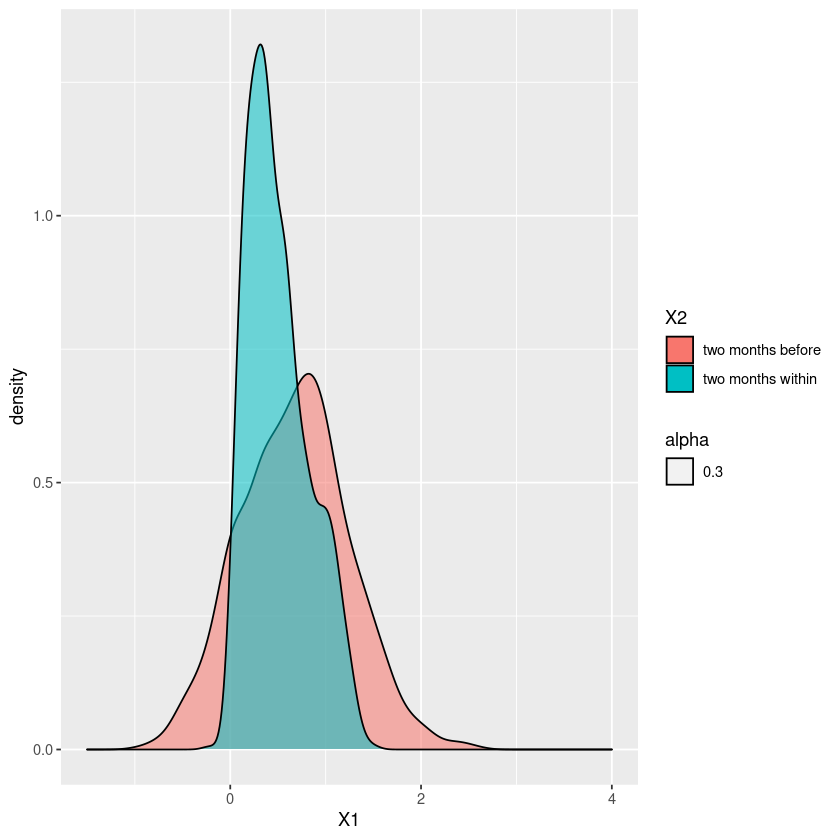

In [12]:
ggplot(plot.data, aes(x = X1, group = X2, fill = X2, alpha = 0.3)) +
    geom_density() +
    scale_x_continuous(limits = c(-1.5, 4))

In [ ]:
# to remind ourselves of the effect sizes:
paste("Treating people within two months of the election has an effect of", weighted.effect.two.months.within.election.day)

paste("Treating people two months before the election has an effect of", weighted.effect.two.months.before.election.day)